# 0. Homework #6 Noise
Evan Varan, lze4 

## 0.a Imports

In [719]:
import sys
import scipy as sp
import numpy as np
import matplotlib as mpl
from scipy.fftpack import fft, fftfreq
from scipy import signal

# We're going to need this for the noise
import random

import matplotlib.pyplot as plt
#print(plt.style.available)
plt.style.use('classic')

## 0.b Check Versions, etc

In [720]:
print('Python: \t{:2d}.{:1d}'
      .format(sys.version_info[0], sys.version_info[1]))
print('Matplot:\t',mpl.__version__)
print('Numpy:  \t',np.__version__)
print('SciPy:  \t',sp.__version__)

Python: 	 3.12
Matplot:	 3.8.2
Numpy:  	 1.26.3
SciPy:  	 1.12.0rc2


## 0.c Defining constants

In [721]:
# Length 
duration = 2.0

# Frequencies
f1 = 6
f2 = 3

# Sampling Rate
Fs = 20 * max(f1,f2)

# Amplitudes
s1_ampl = 2.0
s2_ampl = 2.5

n1_ampl = 0.1
n2_ampl = 0.5

# 0.d Plotting Helper Functions

In [722]:
def plot_waveform(waveform, name , color):
      plt.figure(figsize=(5,4))
      plt.plot(t, waveform, color=color, label=name)
      plt.title('Signal ' + name, fontsize='small')
      plt.xlabel('Time (sec)', fontsize='small')
      plt.ylabel('Amplitude', fontsize='small')
      plt.grid()
      plt.legend()
      plt.tight_layout()
      plt.show()
      
def compute_freq_nfft(NFFT, sample):
    freq = fftfreq(NFFT,1/sample)
    return freq
    
def compute_nfft(sinusoid):
    NFFT = len(sinusoid)
    z = 20.0 * np.log10(np.abs(fft(sinusoid,NFFT) / len(sinusoid)))
    return z

def plot_single_sided_nfft(sinusoid,sample,name, color1, color2):
    NFFT = len(sinusoid)
    plt.magnitude_spectrum(sinusoid,Fs=sample,window=np.ones(sinusoid.shape),pad_to=NFFT,scale='dB',sides='onesided',color=color1,linestyle='-',label=f'{name} built in')
    plt.plot(compute_freq_nfft(NFFT,sample)[0:NFFT//2], compute_nfft(sinusoid)[0:NFFT//2], color=color2, label=f'{name} comp', linewidth=1)
    plt.title(f'Single-Sided Magnitude Spectrum of Computed vs. Built in {name} fft')
    plt.grid()
    plt.legend()
    plt.figure()
    
def validate_frequency(frequency,color):
    #Validating frequency by drawing a vertical line
    plt.axvline(x=frequency, color=color, linestyle='--')  
    plt.text(frequency + 1, -150, f'frequency =  {frequency}', verticalalignment='center', color = color)

# 1. Plotting and setting up Sinusoids
In Both time and frequency domain


In [723]:
# Time vector and Sinusoids
t = np.arange(0, duration, 1/Fs)
s1 = s1_ampl * np.sin(f1 * 2 * np.pi * t)
s2 = s2_ampl * np.sin(f2 * 2 * np.pi * t)

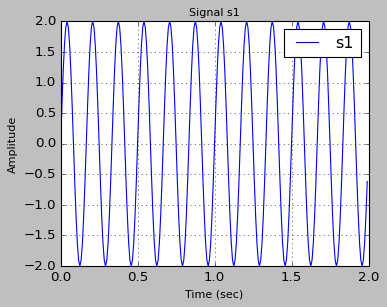

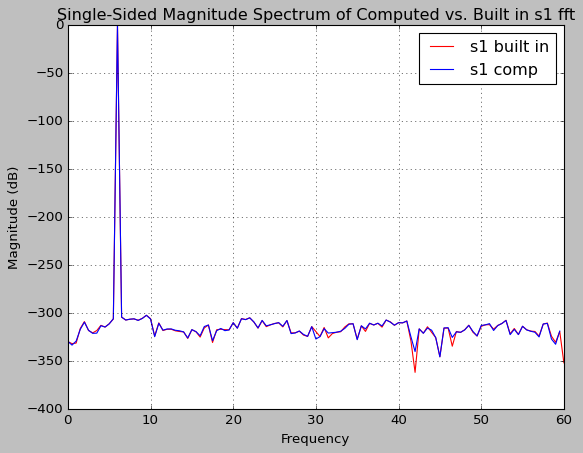

<Figure size 640x480 with 0 Axes>

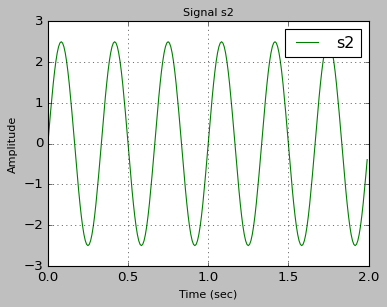

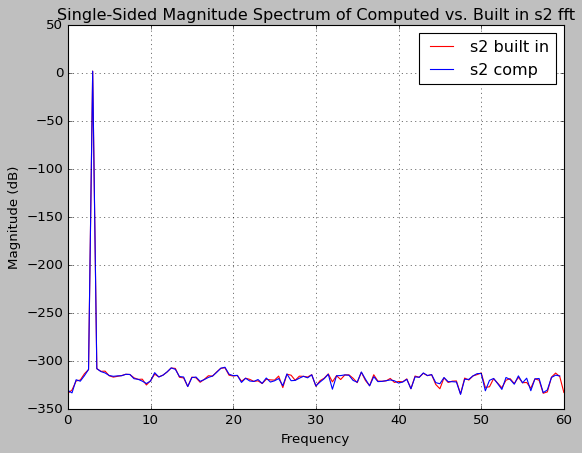

<Figure size 640x480 with 0 Axes>

In [724]:
plot_waveform(s1, "s1", "blue")
plot_single_sided_nfft(s1,Fs,"s1","red","blue")
plot_waveform(s2, "s2", "green")
plot_single_sided_nfft(s2,Fs,"s2","red","blue")

# 1.a Creating and Plotting Noise
First we plot the noise, then we add it to the sinusoids.

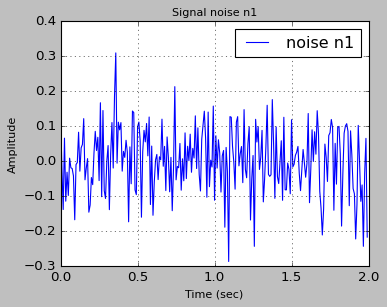

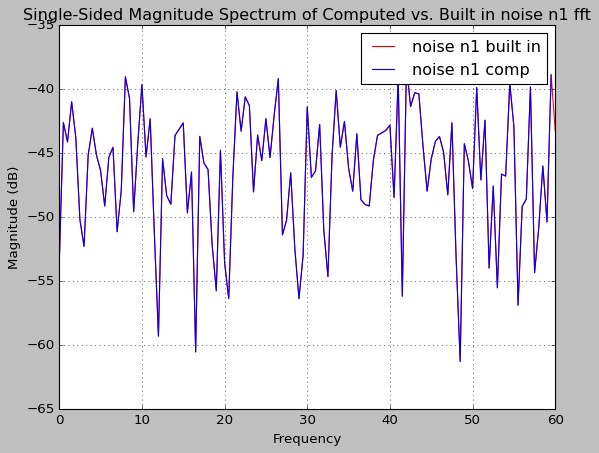

<Figure size 640x480 with 0 Axes>

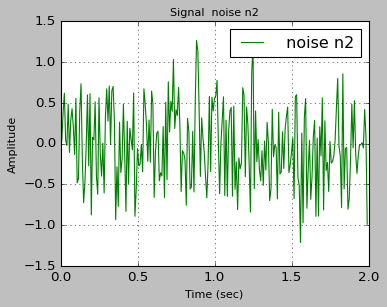

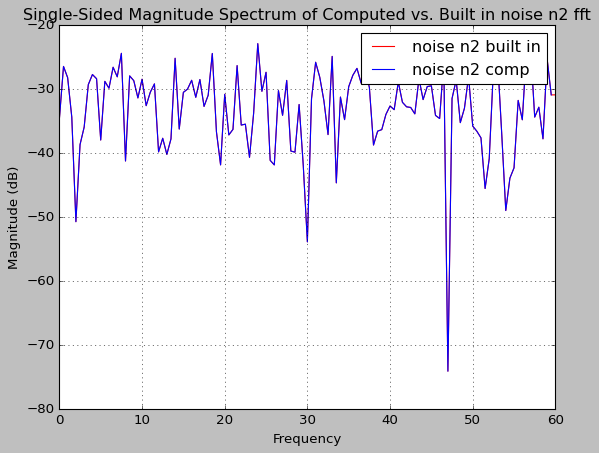

<Figure size 640x480 with 0 Axes>

In [725]:
np.random.seed(84322)

n1 = n1_ampl * np.random.normal(0,1,len(t))
n2 = n2_ampl * np.random.normal(0,1,len(t))

plot_waveform(n1, "noise n1", "blue")
plot_single_sided_nfft(n1,Fs,"noise n1","red","blue")
plot_waveform(n2, " noise n2", "green")
plot_single_sided_nfft(n2,Fs,"noise n2","red","blue")

# 1.c Adding the noise to the sinusoid

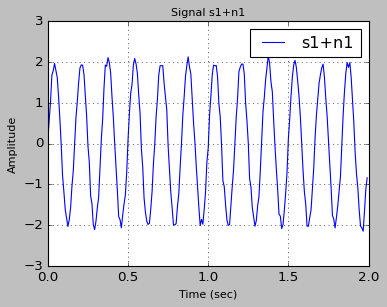

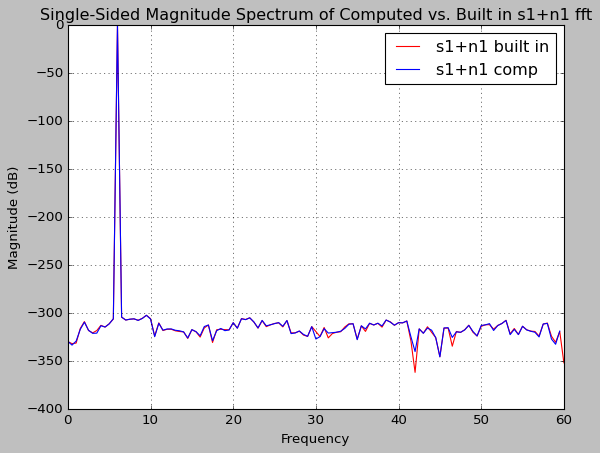

<Figure size 640x480 with 0 Axes>

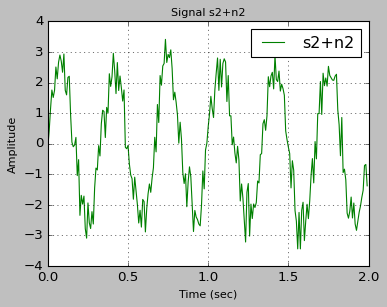

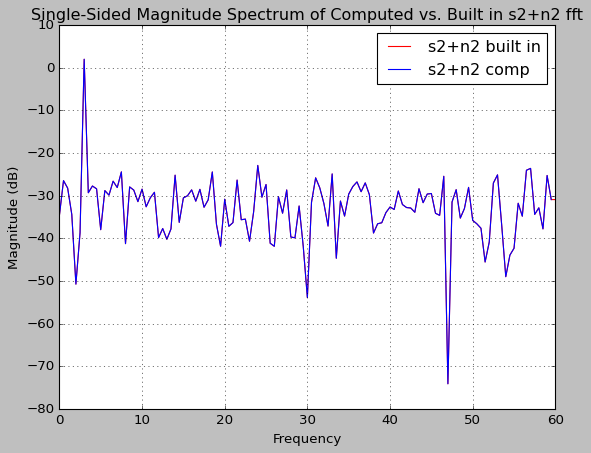

<Figure size 640x480 with 0 Axes>

In [726]:
s1n1 = s1+n1
s2n2 = s2+n2

plot_waveform(s1n1, "s1+n1", "blue")
plot_single_sided_nfft(s1,Fs,"s1+n1","red","blue")
plot_waveform(s2n2, "s2+n2", "green")
plot_single_sided_nfft(s2n2,Fs,"s2+n2","red","blue")

# 2. Changing the Amplitude of the signal and noise.
First we plot the sinusoids with new amplitude.

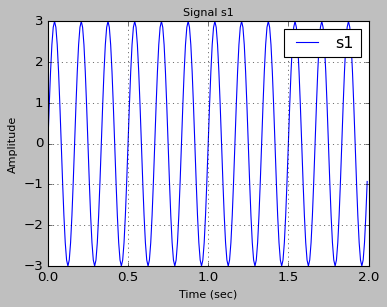

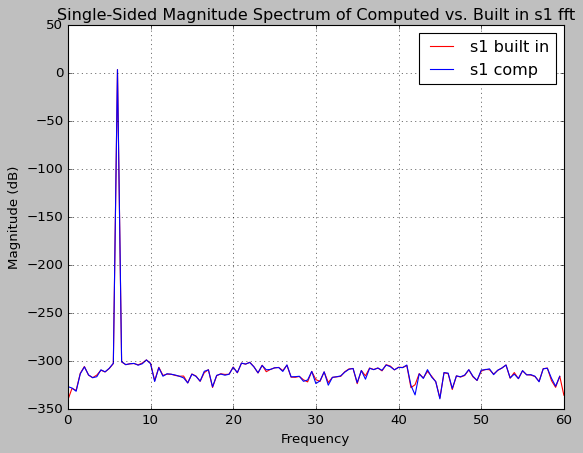

<Figure size 640x480 with 0 Axes>

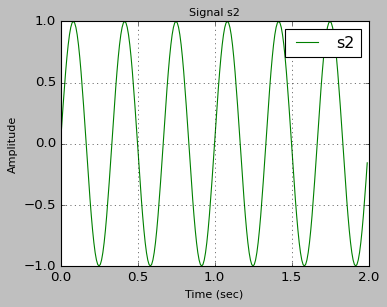

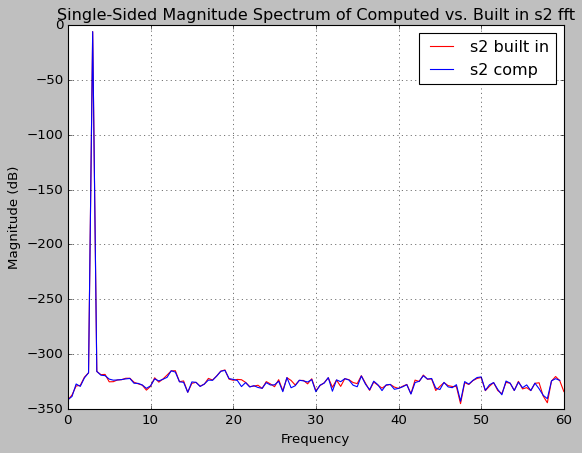

<Figure size 640x480 with 0 Axes>

In [727]:
s1_ampl = 3.0
s2_ampl = 1.0

s1 = s1_ampl * np.sin(f1 * 2 * np.pi * t)
s2 = s2_ampl * np.sin(f2 * 2 * np.pi * t)

plot_waveform(s1, "s1", "blue")
plot_single_sided_nfft(s1,Fs,"s1","red","blue")
plot_waveform(s2, "s2", "green")
plot_single_sided_nfft(s2,Fs,"s2","red","blue")

# 2.a Changing amplitude of noise.

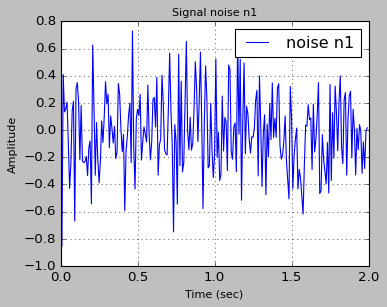

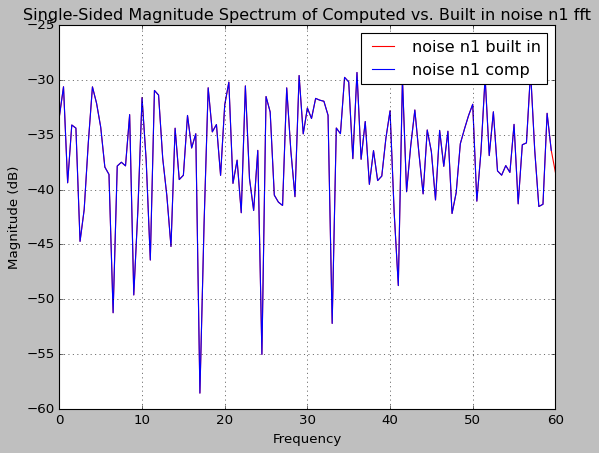

<Figure size 640x480 with 0 Axes>

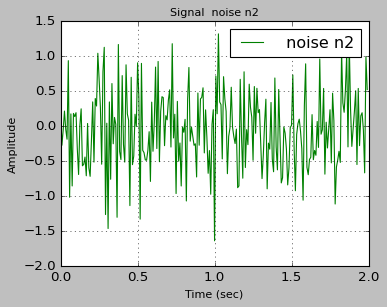

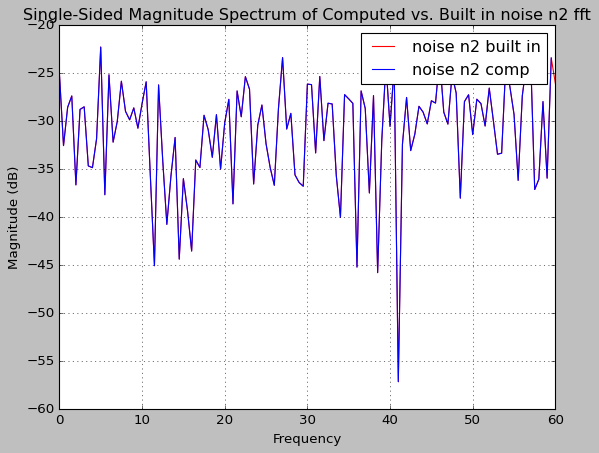

<Figure size 640x480 with 0 Axes>

In [728]:
n1_ampl = 0.3
n2_ampl = 0.6
n1 = n1_ampl * np.random.normal(0,1,len(t))
n2 = n2_ampl * np.random.normal(0,1,len(t))

plot_waveform(n1, "noise n1", "blue")
plot_single_sided_nfft(n1,Fs,"noise n1","red","blue")
plot_waveform(n2, " noise n2", "green")
plot_single_sided_nfft(n2,Fs,"noise n2","red","blue")

# 2.c Plotting the new sinusoids with the new noise

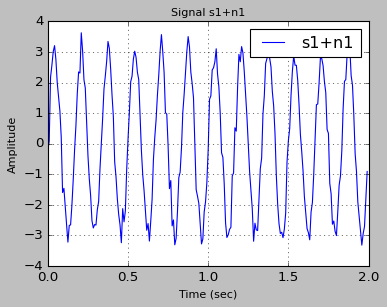

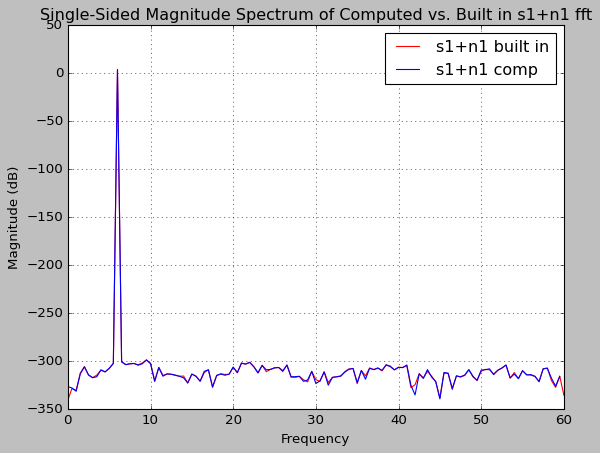

<Figure size 640x480 with 0 Axes>

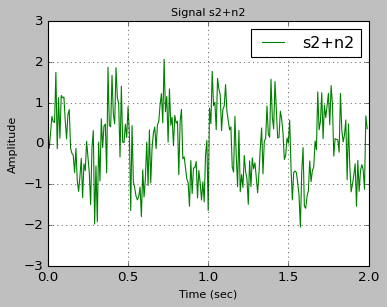

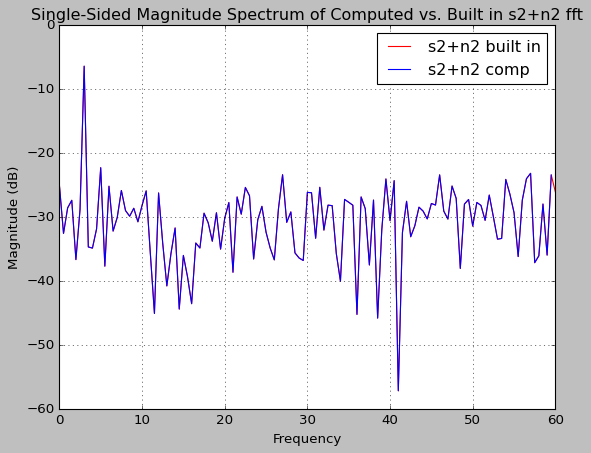

<Figure size 640x480 with 0 Axes>

In [729]:
s1n1 = s1+n1
s2n2 = s2+n2

plot_waveform(s1n1, "s1+n1", "blue")
plot_single_sided_nfft(s1,Fs,"s1+n1","red","blue")
plot_waveform(s2n2, "s2+n2", "green")
plot_single_sided_nfft(s2n2,Fs,"s2+n2","red","blue")

# 3. Creating a function that adds noise to a signal.

In [730]:
def add_noise(sinusoid, noise_amount):
      noise = np.random.normal(0,noise_amount,sinusoid.shape)
      sinusoid_with_noise = sinusoid + noise
      return sinusoid_with_noise

# 3.a Testing the function:

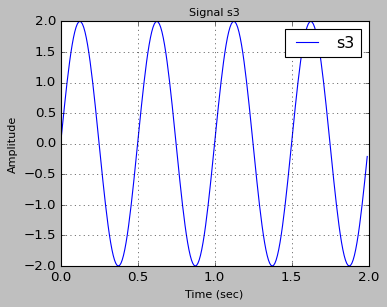

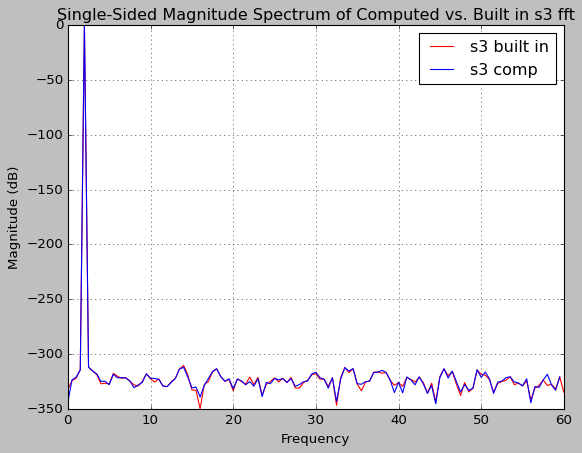

<Figure size 640x480 with 0 Axes>

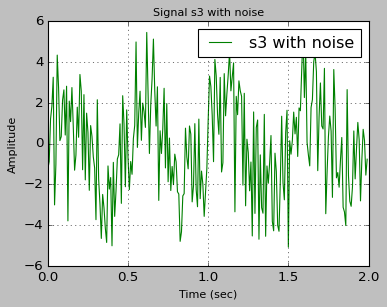

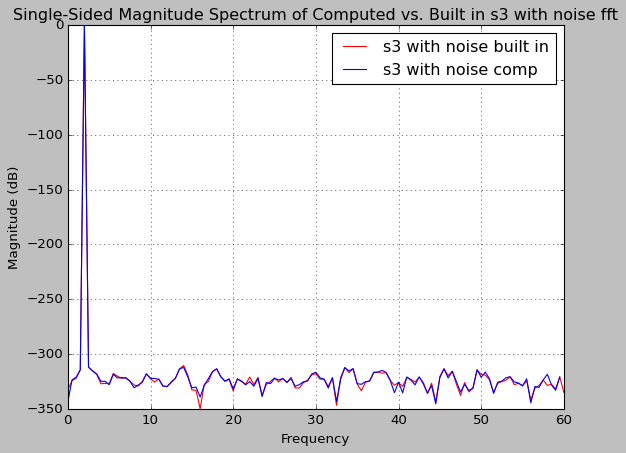

<Figure size 640x480 with 0 Axes>

In [731]:
s3 = 2 * np.sin(2 * 2 * np.pi * t)
s3_with_noise = add_noise(s3, 2)

plot_waveform(s3, "s3", "blue")
plot_single_sided_nfft(s3,Fs,"s3","red","blue")
plot_waveform(s3_with_noise, "s3 with noise", "green")
plot_single_sided_nfft(s3,Fs,"s3 with noise","red","blue")

# 4. Calculating the SNR for different cases
First lets set up a helper method

In [732]:
def find_snr(sinusoid, noise_signal):
      noise = noise_signal - sinusoid
      sinusoid_power = np.mean(sinusoid**2)
      noise_power = np.mean(noise**2)
      snr = 10 * np.log10(sinusoid_power/noise_power)
      return snr
def plot_snr(snr):
      plt.figure(figsize=(10, 6))
      plt.annotate(f'SNR: {snr} dB', xy=(1.25, 600), color='yellow')

# 4.a Testing our method with previously defined signals

In [733]:
print("SNR of s1 is: ", find_snr(s1,s1n1))
print("SNR of s2 is: ", find_snr(s2,s2n2))
print("SNR of s3 is: ", find_snr(s3,s3_with_noise))

SNR of s1 is:  17.490946283018584
SNR of s2 is:  2.0290952053939466
SNR of s3 is:  -2.6490405556841754


# 5. Testing our previously made methods with all cases.

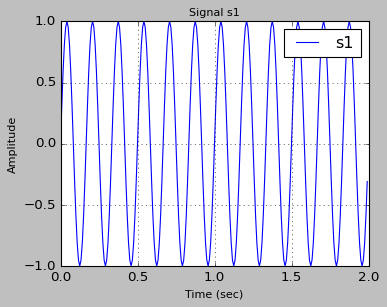

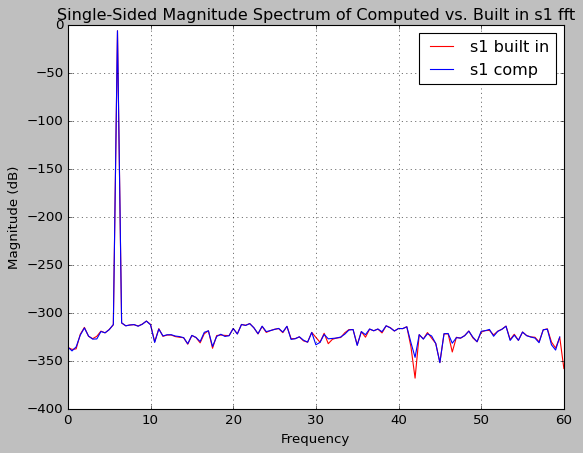

<Figure size 640x480 with 0 Axes>

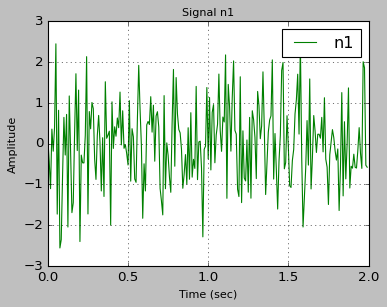

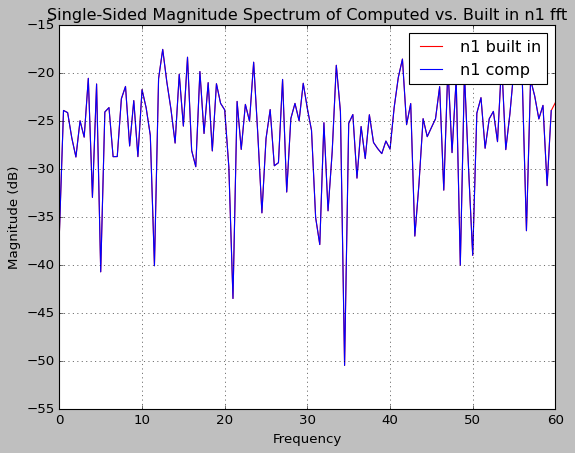

<Figure size 640x480 with 0 Axes>

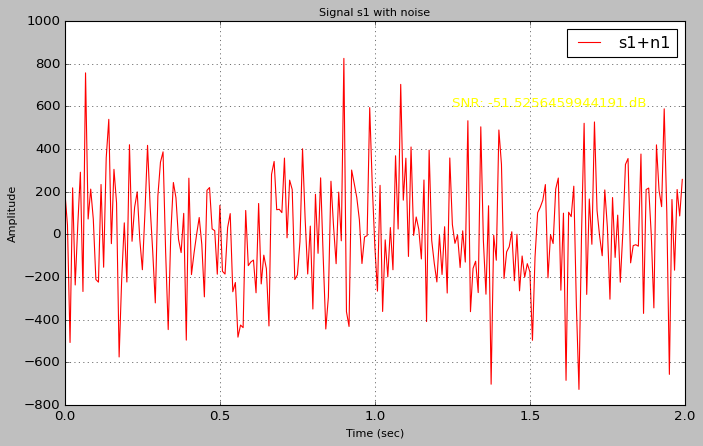

In [735]:
#With a single non modified sinusoid
s1 = np.sin(f1 * 2 * np.pi * t)
plot_waveform(s1, "s1", "blue")
plot_single_sided_nfft(s1,Fs,"s1","red","blue")

n1 = np.random.normal(0,1,len(t))
plot_waveform(n1, "n1", "green")
plot_single_sided_nfft(n1,Fs,"n1","red","blue")


signal_with_noise = add_noise(s1,n1.size)
plot_snr(find_snr(s1,signal_with_noise))
plt.plot(t, signal_with_noise, color='red', label='s1+n1')
plt.title('Signal s1 with noise', fontsize='small')
plt.xlabel('Time (sec)', fontsize='small')
plt.ylabel('Amplitude', fontsize='small')
plt.grid()
plt.legend()
plt.show()

# 5.a Changing the amplitudes of the sinusoid and noise

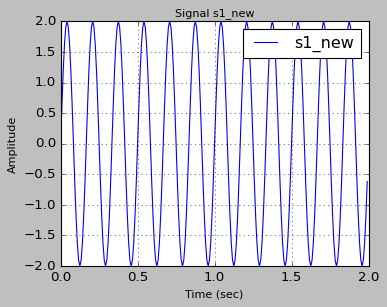

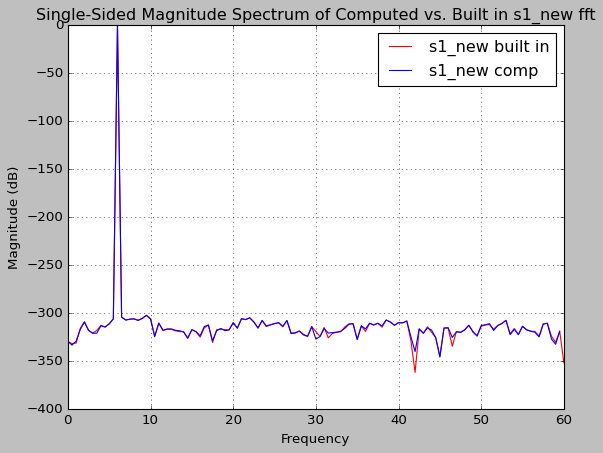

<Figure size 640x480 with 0 Axes>

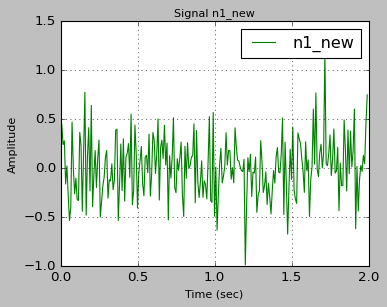

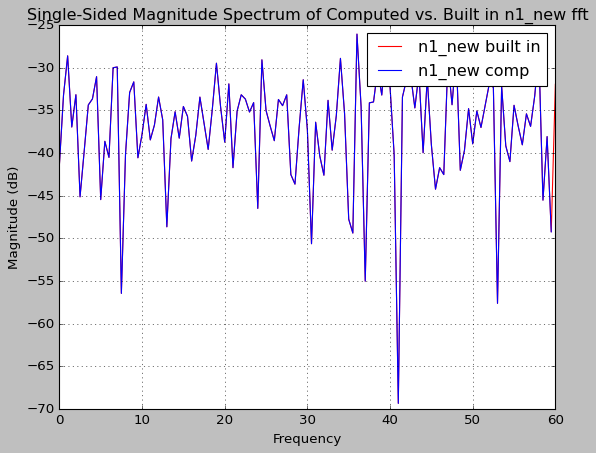

<Figure size 640x480 with 0 Axes>

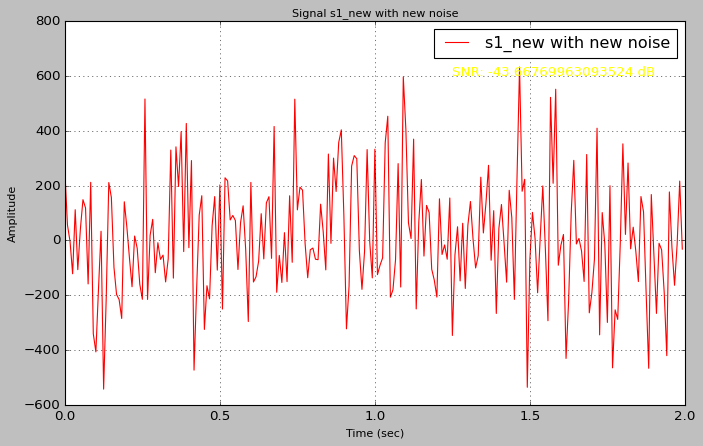

In [736]:
#With a single amplitude modified sinusoid
s1_amp = 2
s1_new = s1_amp * np.sin(f1 * 2 * np.pi * t)
plot_waveform(s1_new, "s1_new", "blue")
plot_single_sided_nfft(s1_new,Fs,"s1_new","red","blue")

n1_amp = 0.3
n1_new = n1_amp * np.random.normal(0,1,len(t))
plot_waveform(n1_new, "n1_new", "green")
plot_single_sided_nfft(n1_new,Fs,"n1_new","red","blue")

signal_with_noise = add_noise(s1_new,n1_new.size)
plot_snr(find_snr(s1_new,signal_with_noise))
plt.plot(t, signal_with_noise, color='red', label='s1_new with new noise')
plt.title('Signal s1_new with new noise', fontsize='small')
plt.xlabel('Time (sec)', fontsize='small')
plt.ylabel('Amplitude', fontsize='small')
plt.grid()
plt.legend()
plt.show()


# 5.b Adding two sinusoids together with different amplitudes

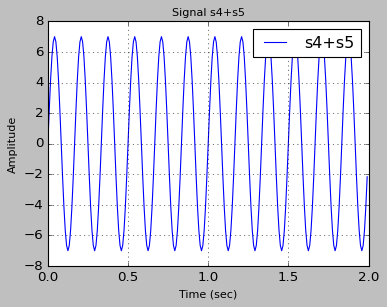

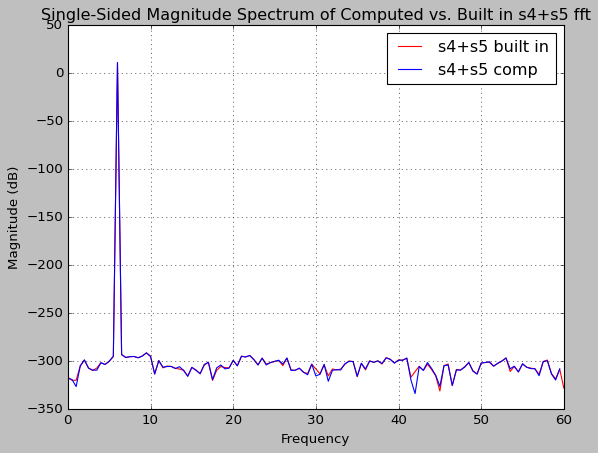

<Figure size 640x480 with 0 Axes>

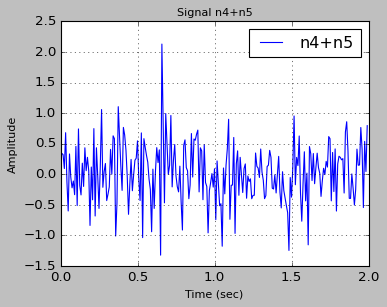

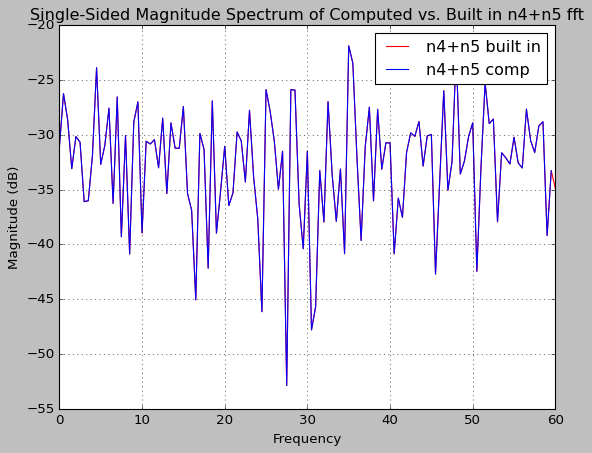

<Figure size 640x480 with 0 Axes>

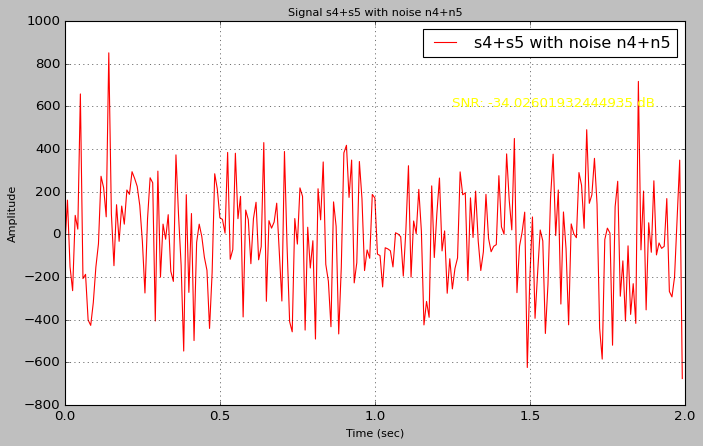

In [737]:
#With two sinusoids added together with different amplitudes
s4_amp = 2
s5_amp = 5
s4 = s4_amp * np.sin(f1 * 2 * np.pi * t)
s5 = s5_amp * np.sin(f1 * 2 * np.pi * t)
s6 = s4 + s5
plot_waveform(s6, "s4+s5", "blue")
plot_single_sided_nfft(s6,Fs,"s4+s5","red","blue")

n4_amp = 0.5
n4 = n4_amp * np.random.normal(0,1,len(t))

n5_amp = 0.1
n5 = n5_amp * np.random.normal(0,1,len(t))

n6 = n4+n5

plot_waveform(n6, "n4+n5", "blue")
plot_single_sided_nfft(n6,Fs,"n4+n5","red","blue")

signal_with_noise = add_noise(s6,n6.size)
plot_snr(find_snr(s6,signal_with_noise))
plt.plot(t, signal_with_noise, color='red', label='s4+s5 with noise n4+n5')
plt.title('Signal s4+s5 with noise n4+n5', fontsize='small')
plt.xlabel('Time (sec)', fontsize='small')
plt.ylabel('Amplitude', fontsize='small')
plt.grid()
plt.legend()
plt.show()
